# Aula 04 - Exercício 03
## PCA e Regressão Polinomial Multivariada
### Alunos:
 - Antonio Moreira (9779242) 

# PCA
 O conjunto Iris consiste na medida de 4 características de plantas e seus respectivos tipos. Embora não é possível visualizar o conjunto de 4 dimensões, podemos utilizar a técnica PCA para reduzir a dimensionalidade do conjunto para 2 ou 3 dimensões.
- Utilize a técnica PCA para visualizar em 2 dimensões o conjunto Iris, já carregado abaixo. 
Lembre-se que os dados devem estar normalizados e centrados na média antes de aplicar o PCA.
  - Dica: Utilize a classe StandardScaler para pré-processar os dados

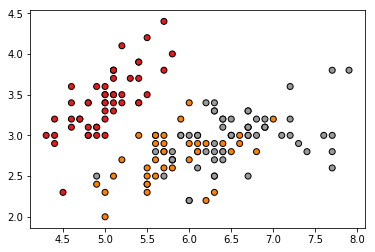

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

%matplotlib inline

iris = datasets.load_iris()
x = iris.data
y = iris.target
#####

#####
#plt.figure()
#plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')

scaler = StandardScaler()
x_norm = scaler.fit_transform(x)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_norm)

plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')



---

- Mostre a variância e a porcentagem da variância que é expressa por cada componente principal.
  - Dica: Utilize as variáveis `explained_variance_`  e `explained_variance_ratio_`  da classe PCA. 

In [2]:
print("Explained Variance \t\t", pca.explained_variance_)
    # a magnitudo do autovetor =? variância que ele expressa
print("Explained Variance Ratio \t", pca.explained_variance_ratio_)
    # quanto cada autovetor (componete principal) expressa a variância total dos dados
    # variance_ratio_ = variance_ / norma(variance_)
        
## https://upload.wikimedia.org/wikipedia/commons/f/f5/GaussianScatterPCA.svg : img

print(pca.components_) #São em R4

Explained Variance 		 [2.93808505 0.9201649 ]
Explained Variance Ratio 	 [0.72962445 0.22850762]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]




---



Para os próximos exercícios utilizaremos a base de dados 'Boston House Prices'.  Os dados possuem dimensionalidade 10, e são distribuidos em 442 exemplos. O pré-carregamento da base já foi feito abaixo.

- Aplique PCA para reduzir a dimensionalidade para 3. Lembre-se de centralizar e normalizar os dados antes de aplicar o PCA

In [3]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Boston
boston = datasets.load_boston()

X = boston.data
y = boston.target

scaler = StandardScaler()
x_norm = scaler.fit_transform(X)

pca_1 = PCA(n_components=3)
x_pca_1 = pca_1.fit_transform(x_norm)

print(pca_1.explained_variance_ratio_)

[0.47129606 0.11025193 0.0955859 ]




---

- Novamente, aplique o algoritmo de PCA para reduzir o número de variáveis do conjunto original para 4.

In [4]:
# Boston
pca_2 = PCA(n_components=4)
x_pca_2 = pca_2.fit_transform(x_norm)

print(pca_2.explained_variance_ratio_)

[0.47129606 0.11025193 0.0955859  0.06596732]




---

- Faça regressão utilizando uma reta no conjunto com dimensão 3 e calcule seu score R2.

In [6]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

regressor_1 = LinearRegression().fit(x_pca_1, y)
y_pred_1 = regressor_1.predict(x_pca_1) # não foi separado dataset_test → dataset_train

print(regressor_1.score(x_pca_1, y))
r2_score(y, y_pred_1)

0.6359238692396254


0.6359238692396254



---

- Agora faça regressão utilizando uma reta com os dados de dimensionalidade 4 e calcule seu score R2.

In [7]:
regressor_2 = LinearRegression().fit(x_pca_2, y)
y_pred_2 = regressor_2.predict(x_pca_2)

r2_score(y, y_pred_2)

0.6477642937695771

    

---

- Utilizando uma função quadrática, faça regressão utilizando as 3 variáveis mais relevantes e calcule seu score R2

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# x_pca_1 > 3 variáveis
p = PolynomialFeatures(degree=2)
x_transform_1 = p.fit_transform(x_pca_1)

print(p.get_feature_names())

regressor_3 = LinearRegression(fit_intercept=False)
regressor_3.fit(x_transform_1, y)

print(regressor_3.coef_.round(3))

y_pred_3 = regressor_3.predict(x_transform_1)
r2_score(y, y_pred_3)

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']
[24.586 -1.885  0.676  4.27  -0.314 -0.336 -0.736 -0.325  0.461  0.269]


0.7035786045963168



---

- Por fim, faça regressão no conjunto de dimensão 4 utilizando uma função quadrática. Calcule seu score R2 e compare com os modelos gerados anteriormente.


In [9]:
# x_pca_1 > 3 variáveis
p = PolynomialFeatures(degree=2)
x_transform_2 = p.fit_transform(x_pca_2)

print(p.get_feature_names())

regressor_4 = LinearRegression(fit_intercept=False)
regressor_4.fit(x_transform_2, y)

print(regressor_4.coef_.round(3))

y_pred_4 = regressor_4.predict(x_transform_2)
r2_score(y, y_pred_4)

['1', 'x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2']
[24.454 -1.97   0.999  4.518  1.062 -0.349 -0.362 -0.656  0.847 -0.216
  0.094 -1.112  0.33   0.044  0.132]


0.7465176855800599